### 1D Example 

In [301]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib 
import scipy

# grid params
N = 128 *10   # num. of points per size
H = 1.0    # Hubble parameter
L = 1.0/H  # conformal size lenght

X = np.linspace(L/N, L, N, endpoint=True) 

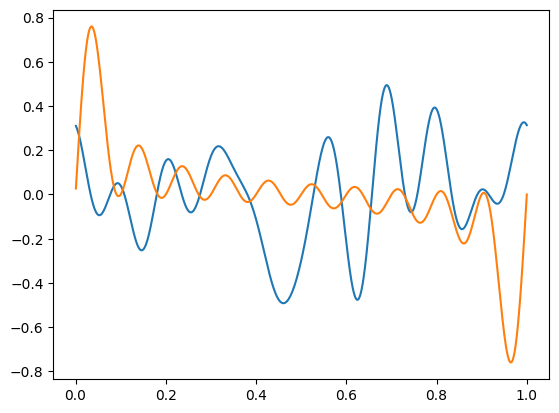

In [310]:
def dphi(x, num_modes=10, phasefactor=1): 
    phase = np.random.rand(num_modes) * 2*np.pi *phasefactor
    amplitude = np.ones(num_modes) /num_modes
    ks = np.arange(num_modes) + 1
    
    dphi = np.zeros_like(X)   
    for i in range(num_modes):
        k = ks[i]   
        dphi += amplitude[i] * np.sin(x * k * (2*np.pi) + phase[i])
        
    return dphi

num_modes = 10

sf1 =  dphi(X, num_modes=num_modes)
sf2 =  dphi(X, num_modes=num_modes, phasefactor=0.0)
plt.plot(X, sf1)
plt.plot(X, sf2)


In [311]:
# 1D example

[False  True]


(1.0, 1000.0)

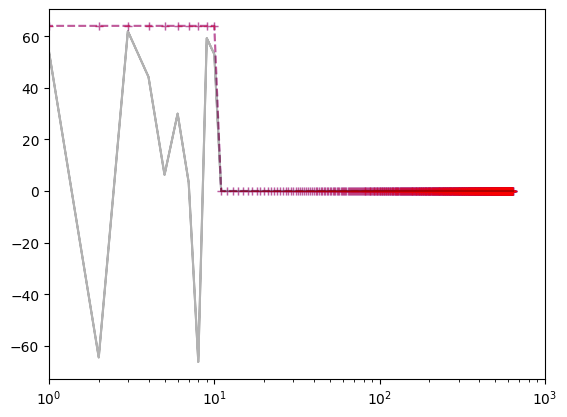

In [312]:
from scipy.fft import fft, fftfreq

# gives complex value for spectra
spectra = fft(sf1)
spectra_nophase = fft(sf2)
freqs = fftfreq(N, 1/N)

print( np.unique( abs(spectra)== abs(spectra_nophase)  ))

plt.plot(freqs[:N//2], abs(spectra)[:N//2], 'b+', label="+ phase", alpha =0.4)
plt.plot(np.abs(freqs[N//2:]), abs(spectra)[N//2:], 'b--', label="- phase", alpha =0.4)
plt.plot(freqs[:N//2], abs(spectra_nophase)[:N//2], 'r+', label="+ no-phase", alpha =0.4)
plt.plot(np.abs(freqs[N//2:]), abs(spectra_nophase)[N//2:], 'r--', label="- no-phase", alpha =0.4)
plt.plot(abs(freqs), (spectra) - (spectra_nophase), 'k-', label="diff", alpha =0.3)
plt.xscale('log')
plt.xlim(1e0,1e3)

# plt.plot(freqs, (spectra), 'b--', label="- phase")
# plt.plot(freqs, (spectra_nophase), 'r-.', label="+ no-phase", alpha =0.3)
# plt.plot(freqs, (spectra - spectra_nophase), 'k-.', label="+ no-phase", alpha =0.3)

# plt.xlim(0,20)
# plt.xscale('log')
# plt.xlim(1e-2,1e3)

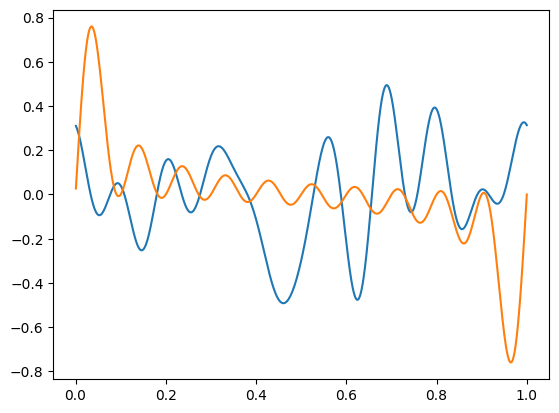

In [313]:
from scipy.fft import ifft

new_dphi = ifft(np.array(spectra))
new_dphi02 = ifft(np.array(spectra_nophase))
new_dphi_abs = ifft(np.abs(spectra))


plt.plot(X, new_dphi)
plt.plot(X, new_dphi02)
# plt.plot(X, new_dphi_abs)
plt.show()




###  2D Example

In [322]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib 
import scipy

# grid params
N = 128 *10  # num. of points per size
H = 1.0    # Hubble parameter
L = 1.0/H  # conformal size lenght

X, Y = np.meshgrid(np.linspace(L/N, L, N, endpoint=True), np.linspace(L/N, L, N, endpoint=True) )

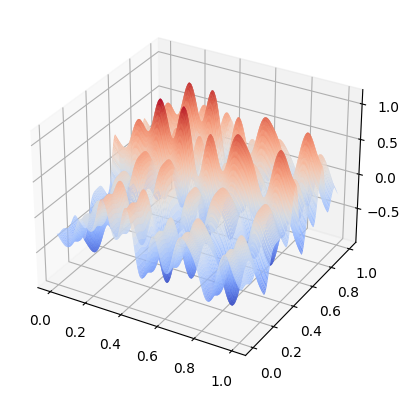

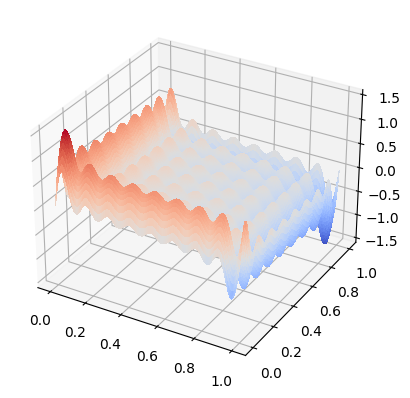

In [331]:
from matplotlib import cm

def dphi_2d(x, y, num_modes=2, phasefactor=1): 
    phasex = np.random.rand(num_modes) * 2*np.pi *phasefactor
    phasey = np.random.rand(num_modes) * 2*np.pi *phasefactor
    amplitude = np.ones(num_modes) /num_modes
    ks = np.arange(num_modes) + 1
    
    dphi = np.zeros_like(x)
    
    for i in range(num_modes):
        k = ks[i]   
        dphi += amplitude[i] * ( 
                                np.sin(x * k * (2*np.pi) + phasex[i]) + 
                                np.sin(y * k * (2*np.pi) + phasey[i]) 
                               )
        
    return dphi

num_modes = 8

sf1 =  dphi_2d(X, Y, num_modes=num_modes)
sf2 =  dphi_2d(X, Y, num_modes=num_modes, phasefactor=0.0)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, sf1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True,rcount=200, ccount=200)
plt.show()
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, sf2,  cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, rcount=200, ccount=200)
plt.show()



[False  True]


(1.0, 1000.0)

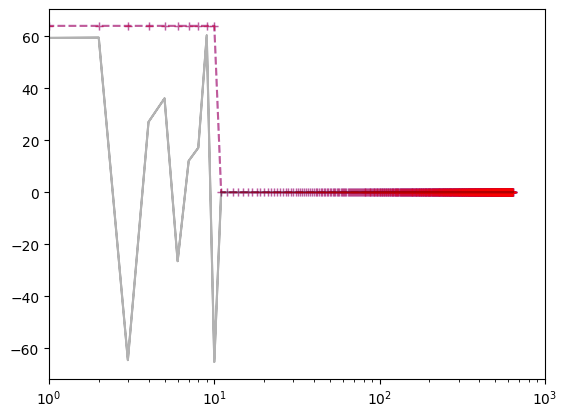

In [324]:

sf1_flat = np.array([np.sum(sf1[i,:]) for i in range(N)])/N
sf2_flat = np.array([np.sum(sf2[i,:]) for i in range(N)])/N


from scipy.fft import fft, fftfreq

# gives complex value for spectra
spectra = fft(sf1_flat)
spectra_nophase = fft(sf2_flat)
freqs = fftfreq(N, 1/N)

print( np.unique( abs(spectra)== abs(spectra_nophase)  ))

plt.plot(freqs[:N//2], abs(spectra)[:N//2], 'b+', label="+ phase", alpha =0.4)
plt.plot(np.abs(freqs[N//2:]), abs(spectra)[N//2:], 'b--', label="- phase", alpha =0.4)
plt.plot(freqs[:N//2], abs(spectra_nophase)[:N//2], 'r+', label="+ no-phase", alpha =0.4)
plt.plot(np.abs(freqs[N//2:]), abs(spectra_nophase)[N//2:], 'r--', label="- no-phase", alpha =0.4)
plt.plot(abs(freqs), (spectra) - (spectra_nophase), 'k-', label="diff", alpha =0.3)
plt.xscale('log')
plt.xlim(1e0,1e3)